In [1]:
# import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
#a file containing a dictionary of encoding names and associated aliases 
from encodings.aliases import aliases 

In [3]:
# to find encoding that work
#below line creates a set of available encodings
alias_values = set(aliases.values())

for encoding in set(aliases.values()):
    try: 
        df = pd.read_csv("crime.csv", nrows=10, encoding=encoding)#read in only 10 lines for faster processing 
        print("Succesful", encoding)
    except: 
        pass 

Succesful cp037
Succesful mac_latin2
Succesful cp1140
Succesful iso8859_10
Succesful iso8859_16
Succesful koi8_r
Succesful iso8859_6
Succesful big5hkscs
Succesful cp1252
Succesful mbcs
Succesful mac_greek
Succesful cp273
Succesful cp869
Succesful cp1250
Succesful kz1048
Succesful cp860
Succesful iso8859_2
Succesful cp862
Succesful iso8859_14
Succesful utf_16_be
Succesful cp1257
Succesful gb18030
Succesful cp857
Succesful cp864
Succesful cp866
Succesful cp1125
Succesful cp500
Succesful hp_roman8
Succesful mac_cyrillic
Succesful iso8859_15
Succesful iso8859_3
Succesful cp855
Succesful cp861
Succesful latin_1
Succesful cp863
Succesful cp1251
Succesful iso8859_13
Succesful cp775
Succesful iso8859_9
Succesful iso8859_11
Succesful cp1258
Succesful iso8859_7
Succesful mac_roman
Succesful cp1255
Succesful gbk
Succesful cp1026
Succesful cp1254
Succesful cp852
Succesful cp1253
Succesful iso8859_4
Succesful cp850
Succesful cp1256
Succesful utf_16_le
Succesful cp865
Succesful cp437
Succesful cp932

In [4]:
#Read in crimne csv and use time stamp as datetime index 

crime = pd.read_csv("crime.csv", encoding = "iso8859_11")

#preview how the dataset looks 

crime.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [5]:
#checking shape of data, 319073 rows, 17 columns 

crime.shape

(319073, 17)

In [6]:
#check for number of duplicate rows
crime.duplicated().sum()

23

In [7]:
#all our duplicate rows 
crime[crime.duplicated()]

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
318745,I152030570-00,3125,Warrant Arrests,WARRANT ARREST,E13,303,NaN,2016-10-29 08:25:00,2016,10,Saturday,8,Part Three,W WALNUT PARK,42.317207,-71.098799,"(42.31720702, -71.09879922)"
318752,I152026775-00,3115,Investigate Person,INVESTIGATE PERSON,C6,936,NaN,2015-10-19 16:04:00,2015,10,Monday,16,Part Three,ORTON-MAROTTA WAY,42.338573,-71.055755,"(42.33857289, -71.05575501)"
318755,I152026488-00,3125,Warrant Arrests,WARRANT ARREST,A1,105,NaN,2017-01-31 10:00:00,2017,1,Tuesday,10,Part Three,FRUIT ST,42.362403,-71.069547,"(42.36240281, -71.06954652)"
318781,I152006153-00,1849,Drug Violation,"DRUGS - POSS CLASS B - COCAINE, ETC.",C6,179,NaN,2015-09-16 11:30:00,2015,9,Wednesday,11,Part Two,MASSACHUSETTS AVE,42.332531,-71.072130,"(42.33253100, -71.07213000)"
318785,I152004688-00,3125,Warrant Arrests,WARRANT ARREST,A1,120,NaN,2016-07-19 12:50:00,2016,7,Tuesday,12,Part Three,BOYLSTON ST,42.352418,-71.065255,"(42.35241815, -71.06525499)"
318808,I142060752-00,2610,Other,TRESPASSING,B2,280,NaN,2015-12-11 12:50:00,2015,12,Friday,12,Part Two,DUDLEY ST,42.328726,-71.083822,"(42.32872589, -71.08382217)"
318810,I142060752-00,3125,Warrant Arrests,WARRANT ARREST,B2,280,NaN,2015-12-11 12:50:00,2015,12,Friday,12,Part Three,DUDLEY ST,42.328726,-71.083822,"(42.32872589, -71.08382217)"
318826,I142049917-00,1402,Vandalism,VANDALISM,C11,395,NaN,2015-09-03 13:00:00,2015,9,Thursday,13,Part Two,DORCHESTER AVE,42.285260,-71.064441,"(42.28526024, -71.06444063)"
318866,I142025900-00,3125,Warrant Arrests,WARRANT ARREST,E13,577,NaN,2015-12-01 18:00:00,2015,12,Tuesday,18,Part Three,AMORY ST,42.317713,-71.101805,"(42.31771264, -71.10180456)"
318887,I142017108-00,1841,Drug Violation,DRUGS - POSS CLASS A - INTENT TO MFR DIST DISP,A1,64,NaN,2015-06-16 15:55:00,2015,6,Tuesday,15,Part Two,FRUIT ST,42.362403,-71.069547,"(42.36240281, -71.06954652)"


In [8]:
#drop our duplicate rows 
crime.drop_duplicates(inplace=True)

In [9]:
#check our shape after dropping duplicate rows too see if successful 
crime.shape

(319050, 17)

In [10]:
#check top of dataframe
crime.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [11]:
#check bottom of dataframe
crime.tail()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"
319072,142052550,3125,Warrant Arrests,WARRANT ARREST,D4,903,NaN,2015-06-22 00:12:00,2015,6,Monday,0,Part Three,WASHINGTON ST,42.333839,-71.080290,"(42.33383935, -71.08029038)"


In [12]:
crime

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [13]:
crime.info() #summary information about dataframe 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319050 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319050 non-null  object 
 1   OFFENSE_CODE         319050 non-null  int64  
 2   OFFENSE_CODE_GROUP   319050 non-null  object 
 3   OFFENSE_DESCRIPTION  319050 non-null  object 
 4   DISTRICT             317285 non-null  object 
 5   REPORTING_AREA       319050 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319050 non-null  object 
 8   YEAR                 319050 non-null  int64  
 9   MONTH                319050 non-null  int64  
 10  DAY_OF_WEEK          319050 non-null  object 
 11  HOUR                 319050 non-null  int64  
 12  UCR_PART             318960 non-null  object 
 13  STREET               308179 non-null  object 
 14  Lat                  299052 non-null  float64
 15  Long             

In [14]:
#change occured on date from an object to a datetime datatyoe 
crime.OCCURRED_ON_DATE = pd.to_datetime(crime.OCCURRED_ON_DATE)

crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319050 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   INCIDENT_NUMBER      319050 non-null  object        
 1   OFFENSE_CODE         319050 non-null  int64         
 2   OFFENSE_CODE_GROUP   319050 non-null  object        
 3   OFFENSE_DESCRIPTION  319050 non-null  object        
 4   DISTRICT             317285 non-null  object        
 5   REPORTING_AREA       319050 non-null  object        
 6   SHOOTING             1019 non-null    object        
 7   OCCURRED_ON_DATE     319050 non-null  datetime64[ns]
 8   YEAR                 319050 non-null  int64         
 9   MONTH                319050 non-null  int64         
 10  DAY_OF_WEEK          319050 non-null  object        
 11  HOUR                 319050 non-null  int64         
 12  UCR_PART             318960 non-null  object        
 13  STREET        

In [15]:
#extract datetime information from the occured_on_date column 
#extract the year from the occured_on_date column 
crime.OCCURRED_ON_DATE.dt.year
crime.OCCURRED_ON_DATE.dt.year.value_counts()

2017    100884
2016     99110
2018     65685
2015     53371
Name: OCCURRED_ON_DATE, dtype: int64

In [16]:
#extract the month from the occured_on_date column 
crime.OCCURRED_ON_DATE.dt.month

0         9
1         8
2         9
3         9
4         9
         ..
319068    6
319069    7
319070    7
319071    5
319072    6
Name: OCCURRED_ON_DATE, Length: 319050, dtype: int64

In [17]:
#extract the week from the occured_on_date column 
crime.OCCURRED_ON_DATE.dt.week

C:\Users\senay\AppData\Local\Temp\ipykernel_82296\2123357242.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  crime.OCCURRED_ON_DATE.dt.week


0         35
1         34
2         36
3         36
4         36
          ..
319068    22
319069    28
319070    28
319071    22
319072    26
Name: OCCURRED_ON_DATE, Length: 319050, dtype: int64

In [18]:
#extract the minute from the occured_on_date column 
crime.OCCURRED_ON_DATE.dt.minute

0          0
1          0
2         27
3         16
4          5
          ..
319068    25
319069    38
319070    38
319071    35
319072    12
Name: OCCURRED_ON_DATE, Length: 319050, dtype: int64

In [19]:
crime.describe() # summary description on numeric columns 

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,319050.000000,319050.000000,319050.000000,319050.000000,299052.000000,299052.000000
mean,2317.516957,2016.560674,6.609622,13.118176,42.214373,-70.908260
std,1185.308921,0.996312,3.273677,6.294258,2.159845,3.493746
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297438,-71.097135
50%,2907.000000,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


In [20]:
crime.describe(include="object") # summary description of non numeric or string columns 

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,DAY_OF_WEEK,UCR_PART,STREET,Location
count,319050,319050,319050,317285,319050,1019,319050,318960,308179,319050
unique,282517,67,244,12,879,1,7,4,4657,18194
top,I162030584,Motor Vehicle Accident Response,SICK/INJURED/MEDICAL - PERSON,B2,,Y,Friday,Part Three,WASHINGTON ST,"(0.00000000, 0.00000000)"
freq,13,37132,18783,49940,20250,1019,48489,158537,14192,19998


In [21]:
crime.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [22]:
np.sum(crime.isnull())

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1765
REPORTING_AREA              0
SHOOTING               318031
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                  10871
Lat                     19998
Long                    19998
Location                    0
dtype: int64

In [23]:
np.sum(crime.isnull()) != 0

INCIDENT_NUMBER        False
OFFENSE_CODE           False
OFFENSE_CODE_GROUP     False
OFFENSE_DESCRIPTION    False
DISTRICT                True
REPORTING_AREA         False
SHOOTING                True
OCCURRED_ON_DATE       False
YEAR                   False
MONTH                  False
DAY_OF_WEEK            False
HOUR                   False
UCR_PART                True
STREET                  True
Lat                     True
Long                    True
Location               False
dtype: bool

In [24]:
crime.isnull().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1765
REPORTING_AREA              0
SHOOTING               318031
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                  10871
Lat                     19998
Long                    19998
Location                    0
dtype: int64

In [25]:
crime.isna().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1765
REPORTING_AREA              0
SHOOTING               318031
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                  10871
Lat                     19998
Long                    19998
Location                    0
dtype: int64

In [26]:
#checking for columns that have missing values 
crime.columns[np.sum(crime.isnull())!=0 ]

Index(['DISTRICT', 'SHOOTING', 'UCR_PART', 'STREET', 'Lat', 'Long'], dtype='object')

In [27]:
crime.isnull().sum() != 0

INCIDENT_NUMBER        False
OFFENSE_CODE           False
OFFENSE_CODE_GROUP     False
OFFENSE_DESCRIPTION    False
DISTRICT                True
REPORTING_AREA         False
SHOOTING                True
OCCURRED_ON_DATE       False
YEAR                   False
MONTH                  False
DAY_OF_WEEK            False
HOUR                   False
UCR_PART                True
STREET                  True
Lat                     True
Long                    True
Location               False
dtype: bool

In [28]:
#checing for columns with no missing values 
crime.columns[np.sum(crime.isnull()) == 0]

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'REPORTING_AREA', 'OCCURRED_ON_DATE', 'YEAR',
       'MONTH', 'DAY_OF_WEEK', 'HOUR', 'Location'],
      dtype='object')

In [29]:
#checking for the number of unique values in each column 

for col in crime.columns: 
    unique_count = crime[col].nunique()
    print(col + " has " + str(unique_count) + " unique values")

INCIDENT_NUMBER has 282517 unique values
OFFENSE_CODE has 222 unique values
OFFENSE_CODE_GROUP has 67 unique values
OFFENSE_DESCRIPTION has 244 unique values
DISTRICT has 12 unique values
REPORTING_AREA has 879 unique values
SHOOTING has 1 unique values
OCCURRED_ON_DATE has 233229 unique values
YEAR has 4 unique values
MONTH has 12 unique values
DAY_OF_WEEK has 7 unique values
HOUR has 24 unique values
UCR_PART has 4 unique values
STREET has 4657 unique values
Lat has 18178 unique values
Long has 18178 unique values
Location has 18194 unique values


# Let's answer some questions 

In [30]:
# What are the most common crimes in terms of offense group
crime.OFFENSE_CODE_GROUP.value_counts()

Motor Vehicle Accident Response              37132
Larceny                                      25935
Medical Assistance                           23540
Investigate Person                           18749
Other                                        18073
                                             ...  
HUMAN TRAFFICKING                                7
INVESTIGATE PERSON                               4
Biological Threat                                2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE        2
Burglary - No Property Taken                     2
Name: OFFENSE_CODE_GROUP, Length: 67, dtype: int64

In [31]:
crime.shape[0]

319050

In [32]:
offense_group_vals = crime.OFFENSE_CODE_GROUP.value_counts()[:10]
offense_group_vals

Motor Vehicle Accident Response    37132
Larceny                            25935
Medical Assistance                 23540
Investigate Person                 18749
Other                              18073
Drug Violation                     16545
Simple Assault                     15826
Vandalism                          15414
Verbal Disputes                    13099
Towed                              11287
Name: OFFENSE_CODE_GROUP, dtype: int64

In [33]:
#offense_group_vals/crime.shape[0]

display(offense_group_vals/crime.shape[0])

Motor Vehicle Accident Response    0.116383
Larceny                            0.081288
Medical Assistance                 0.073782
Investigate Person                 0.058765
Other                              0.056646
Drug Violation                     0.051857
Simple Assault                     0.049604
Vandalism                          0.048312
Verbal Disputes                    0.041056
Towed                              0.035377
Name: OFFENSE_CODE_GROUP, dtype: float64

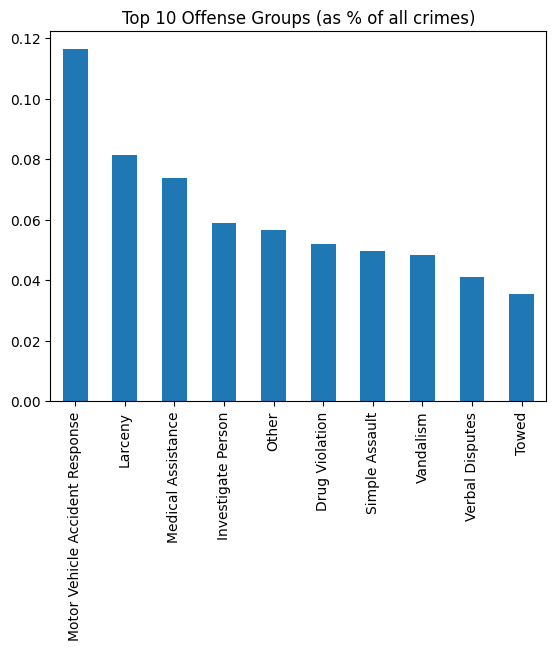

In [34]:
#Creating a bar graph for top 10 offense group 

(offense_group_vals/crime.shape[0]).plot(kind='bar');
plt.title('Top 10 Offense Groups (as % of all crimes)');

In [35]:
#What are the lease offense group ? 
crime.OFFENSE_CODE_GROUP.value_counts().sort_values(ascending=True)

Burglary - No Property Taken                     2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE        2
Biological Threat                                2
INVESTIGATE PERSON                               4
HUMAN TRAFFICKING                                7
                                             ...  
Other                                        18073
Investigate Person                           18749
Medical Assistance                           23540
Larceny                                      25935
Motor Vehicle Accident Response              37132
Name: OFFENSE_CODE_GROUP, Length: 67, dtype: int64

In [36]:
#Top 10 least offense groups 
crime.OFFENSE_CODE_GROUP.value_counts().sort_values(ascending=True)[:10]

Burglary - No Property Taken                  2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE     2
Biological Threat                             2
INVESTIGATE PERSON                            4
HUMAN TRAFFICKING                             7
Gambling                                      8
Manslaughter                                  8
Explosives                                   27
Phone Call Complaints                        31
Aircraft                                     36
Name: OFFENSE_CODE_GROUP, dtype: int64

In [37]:
#What are the most common offense descriptions
crime.OFFENSE_DESCRIPTION.value_counts()

SICK/INJURED/MEDICAL - PERSON                  18783
INVESTIGATE PERSON                             18753
M/V - LEAVING SCENE - PROPERTY DAMAGE          16323
VANDALISM                                      15153
ASSAULT SIMPLE - BATTERY                       14791
                                               ...  
KILLING OF FELON BY POLICE                         1
AUTO THEFT - OUTSIDE - RECOVERED IN BOSTON         1
DRUGS - GLUE INHALATION                            1
ROBBERY - KNIFE - STREET                           1
DRUGS - POSS CLASS D - INTENT MFR DIST DISP        1
Name: OFFENSE_DESCRIPTION, Length: 244, dtype: int64

In [38]:
#Top 10 Most Common Offense Description 
crime.OFFENSE_DESCRIPTION.value_counts()[:10]

offense_description_vals = crime.OFFENSE_DESCRIPTION.value_counts()[:10]

offense_description_vals

SICK/INJURED/MEDICAL - PERSON            18783
INVESTIGATE PERSON                       18753
M/V - LEAVING SCENE - PROPERTY DAMAGE    16323
VANDALISM                                15153
ASSAULT SIMPLE - BATTERY                 14791
VERBAL DISPUTE                           13099
TOWED MOTOR VEHICLE                      11287
INVESTIGATE PROPERTY                     11124
LARCENY THEFT FROM BUILDING               9069
THREATS TO DO BODILY HARM                 9042
Name: OFFENSE_DESCRIPTION, dtype: int64

In [39]:
#same as crime.shape[0]
crime.OFFENSE_DESCRIPTION.count()

319050

In [40]:
# Highest offense description % 
display(offense_description_vals/crime.shape[0]*100)

SICK/INJURED/MEDICAL - PERSON            5.887165
INVESTIGATE PERSON                       5.877762
M/V - LEAVING SCENE - PROPERTY DAMAGE    5.116126
VANDALISM                                4.749412
ASSAULT SIMPLE - BATTERY                 4.635950
VERBAL DISPUTE                           4.105626
TOWED MOTOR VEHICLE                      3.537690
INVESTIGATE PROPERTY                     3.486601
LARCENY THEFT FROM BUILDING              2.842501
THREATS TO DO BODILY HARM                2.834039
Name: OFFENSE_DESCRIPTION, dtype: float64

Text(0.5, 1.0, 'Top 10 Most Common Offense Descriptions')

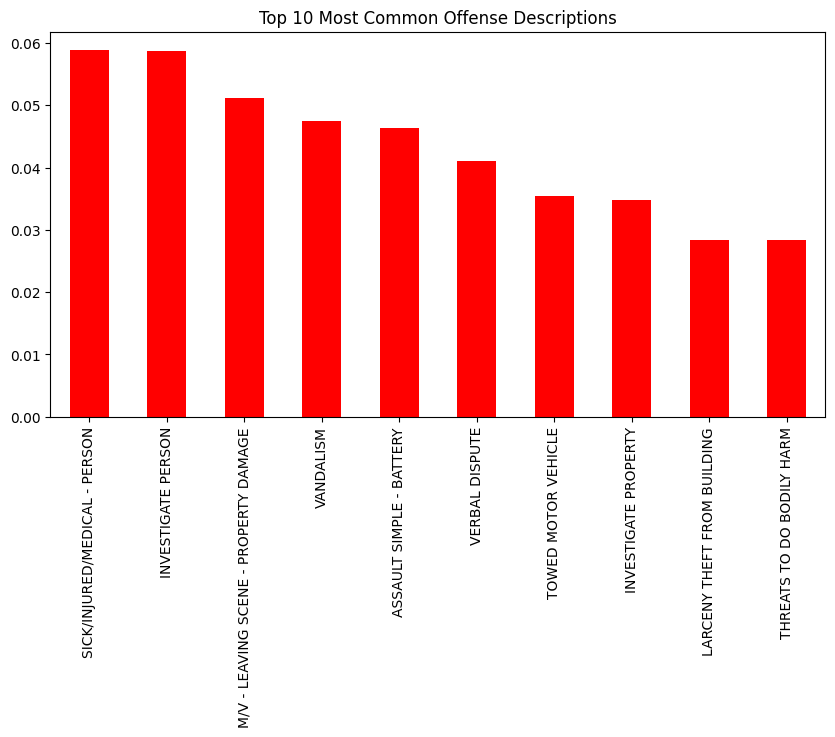

In [41]:
(offense_description_vals/crime.shape[0]).plot(kind='bar', color = "red", figsize=(10,5))
plt.title("Top 10 Most Common Offense Descriptions")

In [42]:
#Total count of incidents 
crime.INCIDENT_NUMBER.count()

319050

In [43]:
#What Years are included 
crime.YEAR.value_counts()

2017    100884
2016     99110
2018     65685
2015     53371
Name: YEAR, dtype: int64

In [44]:
crime.groupby('YEAR')

In [45]:
# In which year were the most crimes committed
crime.groupby("YEAR").count()["INCIDENT_NUMBER"]

YEAR
2015     53371
2016     99110
2017    100884
2018     65685
Name: INCIDENT_NUMBER, dtype: int64

Text(0.5, 1.0, 'Number of Incidents Per Year')

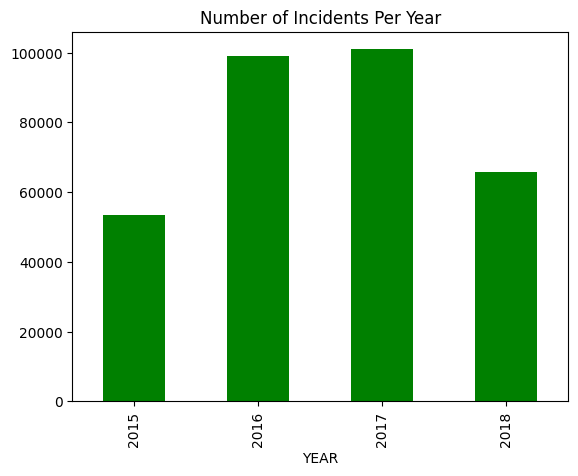

In [46]:
# In which year were the most crimes committed in a bar chart
crime.groupby("YEAR").count()["INCIDENT_NUMBER"].plot(kind="bar", color="green")
plt.title("Number of Incidents Per Year")

In [47]:
# In which day of week were the most crimes committed 
crime.groupby("DAY_OF_WEEK").count()["INCIDENT_NUMBER"].sort_values(ascending=False)

DAY_OF_WEEK
Friday       48489
Wednesday    46727
Thursday     46655
Tuesday      46376
Monday       45674
Saturday     44816
Sunday       40313
Name: INCIDENT_NUMBER, dtype: int64

Text(0.5, 1.0, ' Day of Week Crimes Were Committed')

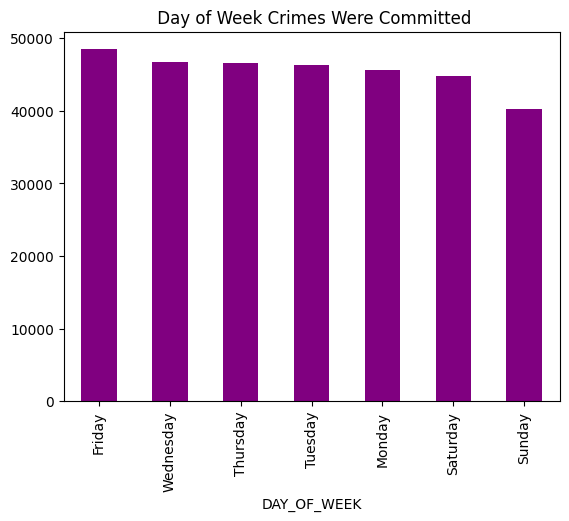

In [48]:
# In which day of week were the most crimes committed in a bar chart
crime.groupby("DAY_OF_WEEK").count()["INCIDENT_NUMBER"].sort_values(ascending=False).plot(kind="bar", color="purple")
plt.title(" Day of Week Crimes Were Committed")

In [49]:
crime.groupby(["HOUR", "DAY_OF_WEEK"]).count()["INCIDENT_NUMBER"]

HOUR  DAY_OF_WEEK
0     Friday         2161
      Monday         2000
      Saturday       2612
      Sunday         2400
      Thursday       2039
                     ... 
23    Saturday       1951
      Sunday         1380
      Thursday       1492
      Tuesday        1296
      Wednesday      1298
Name: INCIDENT_NUMBER, Length: 168, dtype: int64

In [50]:
#In which day of week and hour were the most crimes committed 

week_and_hour = crime.groupby(["HOUR", "DAY_OF_WEEK"]).count()["INCIDENT_NUMBER"].unstack()

week_and_hour

DAY_OF_WEEK,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
HOUR,,,,,,,
0,2161,2000,2612,2400,2039,1897,1997
1,1275,1058,1855,2043,1077,1017,942
2,952,846,1827,1855,774,641,798
3,532,583,957,1119,526,460,412
4,441,386,672,704,436,399,370
5,485,417,478,517,508,462,444
6,768,709,530,543,866,787,823
7,1398,1352,1078,758,1405,1418,1441
8,2041,2046,1515,1123,2037,2145,2135


In [51]:

#rearrange columns for day of week and hour 
week_and_hour.columns = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday',]

<AxesSubplot:ylabel='HOUR'>

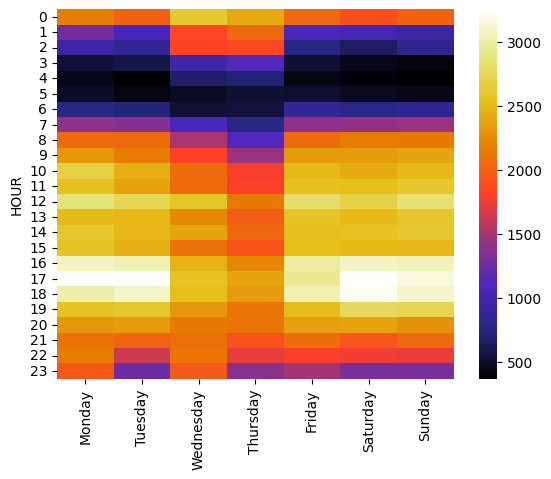

In [52]:
#Heat map for day of week and hour #1 

sns.heatmap(week_and_hour, cmap="CMRmap" )

<AxesSubplot:ylabel='HOUR'>

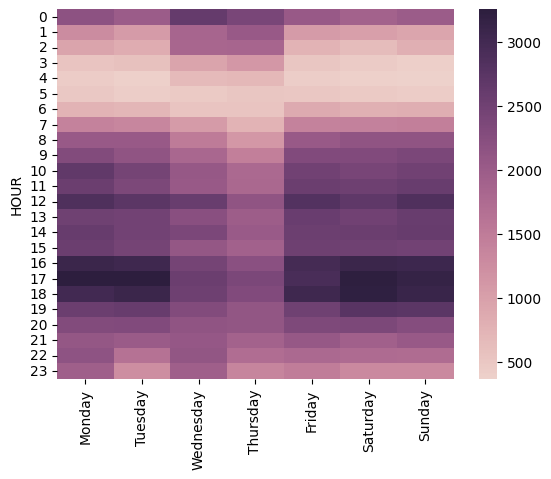

In [53]:
#Heat map for day of week and hour #2 color sample
sns.heatmap(week_and_hour, cmap=sns.cubehelix_palette(as_cmap=True) )

<AxesSubplot:ylabel='HOUR'>

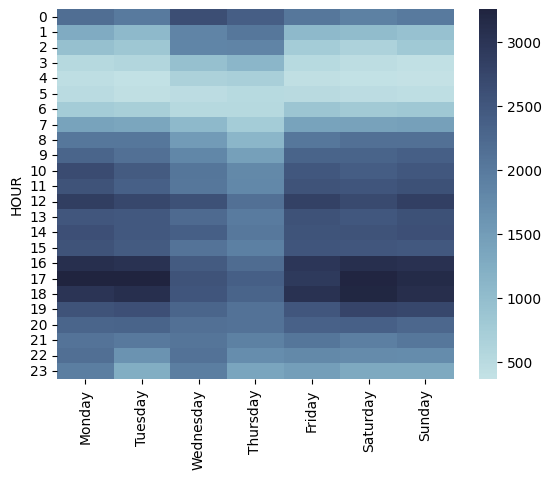

In [54]:
#Heat map for day of week and hour #3 color sample
sns.heatmap(week_and_hour, cmap=sns.cubehelix_palette(as_cmap=True, rot=-0.2) )

#Looks like 5 pm on Monday, Tuesday & Saturday had the most incidents 

Text(0.5, 1.0, 'Crime by Hour')

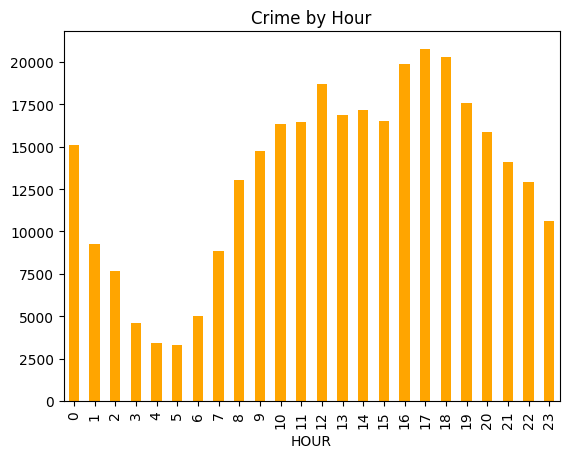

In [151]:
# Are there more crimes during specific hours?
crime.groupby('HOUR').count()['INCIDENT_NUMBER'].plot(kind='bar', color='orange');
plt.title("Crime by Hour")

In [55]:
#In which months were the number of crimes below aveage 
#In which months on average did the most crimes occur 

In [56]:
#if the value is less than the average highlight in blue 

avg_crime = crime.groupby(["YEAR", "MONTH"]).count()["INCIDENT_NUMBER"].mean()
avg_crime

7976.25

In [57]:
print("The average number of crime is " + str(avg_crime))

The average number of crime is 7976.25


In [58]:
crime.groupby(["MONTH", "YEAR"]).count()["INCIDENT_NUMBER"]

MONTH  YEAR
1      2016    7835
       2017    7991
       2018    7782
2      2016    7307
       2017    7408
       2018    6937
3      2016    8199
       2017    8179
       2018    7768
4      2016    8101
       2017    8069
       2018    7916
5      2016    8578
       2017    8715
       2018    8906
6      2015    4188
       2016    8558
       2017    8985
       2018    8834
7      2015    8322
       2016    8618
       2017    9075
       2018    8538
8      2015    8340
       2016    8938
       2017    9206
       2018    8337
9      2015    8411
       2016    8521
       2017    8940
       2018     667
10     2015    8305
       2016    8582
       2017    8846
11     2015    7818
       2016    7922
       2017    7935
12     2015    7987
       2016    7951
       2017    7535
Name: INCIDENT_NUMBER, dtype: int64

In [59]:
year_and_month = crime.groupby(["MONTH", "YEAR"]).count()["INCIDENT_NUMBER"].unstack()
year_and_month

YEAR,2015,2016,2017,2018
MONTH,,,,
1,NaN,7835.0,7991.0,7782.0
2,NaN,7307.0,7408.0,6937.0
3,NaN,8199.0,8179.0,7768.0
4,NaN,8101.0,8069.0,7916.0
5,NaN,8578.0,8715.0,8906.0
6,4188.0,8558.0,8985.0,8834.0
7,8322.0,8618.0,9075.0,8538.0
8,8340.0,8938.0,9206.0,8337.0
9,8411.0,8521.0,8940.0,667.0


In [60]:
%pip install Jinja2

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\senay\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [61]:
def style_negative(v, props=''):
    return props if v < avg_crime else None 

s2 = year_and_month.style.applymap(style_negative, props='color:deepskyblue;' )\
        .applymap(lambda v: 'opacity: 40%;' if (v<0.3) and (v>-0.3) else None)

s2

YEAR,2015,2016,2017,2018
MONTH,,,,
1,nan,7835.000000,7991.000000,7782.000000
2,nan,7307.000000,7408.000000,6937.000000
3,nan,8199.000000,8179.000000,7768.000000
4,nan,8101.000000,8069.000000,7916.000000
5,nan,8578.000000,8715.000000,8906.000000
6,4188.000000,8558.000000,8985.000000,8834.000000
7,8322.000000,8618.000000,9075.000000,8538.000000
8,8340.000000,8938.000000,9206.000000,8337.000000
9,8411.000000,8521.000000,8940.000000,667.000000


In [78]:
#use apply to highlight the maximum in a column in dark green


def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')


s2.apply(highlight_max, props='color:bisque;background-color:darkolivegreen', axis=0)

YEAR,2015,2016,2017,2018
MONTH,,,,
1,nan,7835.000000,7991.000000,7782.000000
2,nan,7307.000000,7408.000000,6937.000000
3,nan,8199.000000,8179.000000,7768.000000
4,nan,8101.000000,8069.000000,7916.000000
5,nan,8578.000000,8715.000000,8906.000000
6,4188.000000,8558.000000,8985.000000,8834.000000
7,8322.000000,8618.000000,9075.000000,8538.000000
8,8340.000000,8938.000000,9206.000000,8337.000000
9,8411.000000,8521.000000,8940.000000,667.000000


In [80]:
#In which district were the most crimes commited on yearly basis ? 

crime.groupby(['YEAR','DISTRICT']).count()['INCIDENT_NUMBER']

YEAR  DISTRICT
2015  A1           6010
      A15          1027
      A7           2426
      B2           8682
      B3           5616
      C11          7363
      C6           3939
      D14          3280
      D4           7203
      E13          2800
      E18          2740
      E5           2157
2016  A1          10922
      A15          1986
      A7           4130
      B2          15706
      B3          11145
      C11         13602
      C6           7072
      D14          6279
      D4          12953
      E13          5558
      E18          5223
      E5           4017
2017  A1          11374
      A15          2167
      A7           4264
      B2          15680
      B3          11195
      C11         13281
      C6           7247
      D14          6509
      D4          13157
      E13          5514
      E18          5611
      E5           4309
2018  A1           7404
      A15          1325
      A7           2724
      B2           9872
      B3           7485
 

In [83]:
district_and_year  = crime.groupby(['DISTRICT','YEAR']).count()['INCIDENT_NUMBER'].unstack()

district_and_year 

YEAR,2015,2016,2017,2018
DISTRICT,,,,
A1,6010,10922,11374,7404
A15,1027,1986,2167,1325
A7,2426,4130,4264,2724
B2,8682,15706,15680,9872
B3,5616,11145,11195,7485
C11,7363,13602,13281,8282
C6,3939,7072,7247,5199
D14,3280,6279,6509,4059
D4,7203,12953,13157,8601


Text(0.5, 1.0, 'District vs Year')

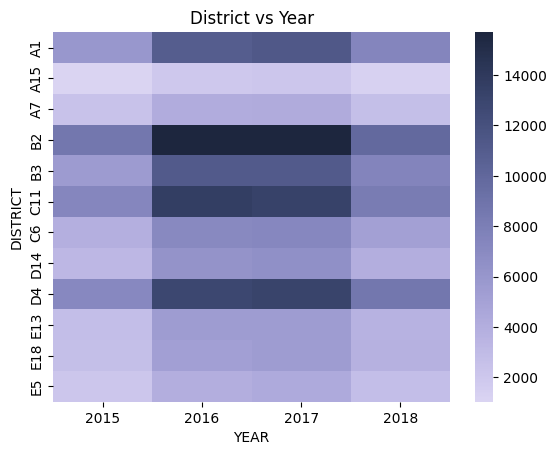

In [147]:
sns.heatmap(district_and_year, cmap=sns.cubehelix_palette(as_cmap=True, start=2.8, rot=.1, n_colors=3))
plt.title('District vs Year')



In [137]:
#In which district were the number of crimes below aveage per year
#In which district on average did the most crimes occur per year

In [139]:
#Average crime per district per year
avg_crime_district = crime.groupby(['DISTRICT','YEAR']).count()['INCIDENT_NUMBER'].mean()

avg_crime_district

6610.104166666667

In [140]:
print("The average crime per district per year is: " + str(avg_crime_district))

The average crime per district per year is: 6610.104166666667


In [141]:
# if the value is less than the average crime per district per year, highlight the value in purple

def style_negative(v, props=''):
    return props if v < avg_crime_district else None 

s3 = district_and_year.style.applymap(style_negative, props = "color:mediumorchid")\
        .applymap(lambda v: 'opacity 20%;' if (v < 0.3) and (v > -0.3) else None )

s3

YEAR,2015,2016,2017,2018
DISTRICT,,,,
A1,6010,10922,11374,7404
A15,1027,1986,2167,1325
A7,2426,4130,4264,2724
B2,8682,15706,15680,9872
B3,5616,11145,11195,7485
C11,7363,13602,13281,8282
C6,3939,7072,7247,5199
D14,3280,6279,6509,4059
D4,7203,12953,13157,8601


In [143]:
#use apply to highlight the maximum in a column 

4627.072916666667

In [146]:
# Highlight the maximum value in each colummn with peach
def highlight_max(s, props=''): 
    return np.where(s==np.nanmax(s.values), props,'')

s3.apply(highlight_max, props='color:darkmagenta;background-color:peachpuff')

YEAR,2015,2016,2017,2018
DISTRICT,,,,
A1,6010,10922,11374,7404
A15,1027,1986,2167,1325
A7,2426,4130,4264,2724
B2,8682,15706,15680,9872
B3,5616,11145,11195,7485
C11,7363,13602,13281,8282
C6,3939,7072,7247,5199
D14,3280,6279,6509,4059
D4,7203,12953,13157,8601
